# project akhir: Movie Recomendation System

Nama: Junpito Salim 

Id Dicoding: 

Sistem rekomendasi telah menjadi komponen penting dalam meningkatkan pengalaman pengguna di platform streaming, seperti Netflix. Dengan begitu banyaknya konten yang tersedia, pengguna sering kali menghadapi kesulitan dalam menemukan film atau acara TV yang sesuai dengan preferensi mereka. Oleh karena itu, proyek ini bertujuan untuk membangun model sistem rekomendasi yang memanfaatkan kombinasi pendekatan berbasis konten (content-based filtering) dan berbasis pengguna (user-based collaborative filtering) untuk memberikan rekomendasi yang relevan, personal, dan akurat kepada pengguna.

# 1| Persiapan 

## 1.1| Persiapan library yang dibutuhkan 

In [1]:
pip install rake_nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## 1.2| Mempersiapkan dataset

Dataset diambil untuk proses pembuatan model menggunakan file `netflix_titles.csv`. Data dimuat ke dalam DataFrame dan ditampilkan beberapa baris awal untuk eksplorasi awal struktur dan isi data.

In [3]:
#ambil dataset untuk conten base filtering
df_movie = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_movie.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# 2 | Data Understanding and Cleaning data 

In [5]:
df_movie.shape

(8807, 12)

kita mendapatkan ukuran dataset, yaitu 8807 baris dan 12 kolom.

In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Terdapat 11 kolom bertipe objek (string), termasuk informasi seperti `title`, `director`, dan `cast`.- 
Satu kolom bertipe numerik:` release_yea`r (tipe int64).

Perintah `df_movie.isnull().sum()` menghitung jumlah nilai kosong (missing values) di setiap kolom. Langkah ini penting untuk mendeteksi kolom yang mungkin membutuhkan pembersihan data lebih lanjut, misalnya dengan mengisi nilai yang hilang atau menghapus data yang tidak relevan.

In [7]:
df_movie.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Terdapat Nilai kosong pada beberapa variabel seperti director,cast dan country

Nilai kosong pada variabel ini tidak diimputasi karena data yang hilang dapat menyebabkan bias. Baris dengan nilai kosong pada variabel ini akan dihapus agar hasil rekomendasi lebih akurat.

In [8]:
#membersihkan data null
cleaned_df= df_movie.dropna()

In [9]:
cleaned_df.shape

(5332, 12)

Hasil data setelah di bersihkan adalah : 5332

In [10]:
df_movie.duplicated().sum()

0

Melihat jumlah niai unique yang ada di dalam dataset.

In [11]:
print('Berikut adalah bentuk nilai unique dari setiap variabel :')
cleaned_df.nunique()

Berikut adalah bentuk nilai unique dari setiap variabel :


show_id         5332
type               2
title           5332
director        3945
cast            5200
country          604
date_added      1453
release_year      72
rating            14
duration         198
listed_in        335
description     5321
dtype: int64

Membersihkan dan memastikan kolom `date_added` memiliki format date_time, sehingga siap digunakan untuk analisis waktu.

In [12]:
#mengubah date update ke datetime format
# Hilangkan spasi ekstra
cleaned_df['date_added'] = cleaned_df['date_added'].str.strip()

# Konversi ke datetime dengan deteksi otomatis
cleaned_df['date_added'] = pd.to_datetime(cleaned_df['date_added'], format='mixed', errors='coerce')

# Cek nilai NaT setelah konversi
missing_dates = cleaned_df['date_added'].isna().sum()
print(f"Jumlah nilai yang tidak dapat dikonversi: {missing_dates}")

# Tangani nilai NaT
cleaned_df['date_added'].fillna('Unknown', inplace=True)



Jumlah nilai yang tidak dapat dikonversi: 0


/tmp/ipykernel_30/278337435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date_added'] = cleaned_df['date_added'].str.strip()
/tmp/ipykernel_30/278337435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date_added'] = pd.to_datetime(cleaned_df['date_added'], format='mixed', errors='coerce')
/tmp/ipykernel_30/278337435.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will chan

In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 541.5+ KB


# 3 | Ekplolatory Data Analisis 

Menampilkan grafik memberikan gambaran perbandingan jumlah antara kategori Movie dan TV Show dalam dataset. Visualisasi ini membantu memahami dominasi salah satu jenis konten dalam data.

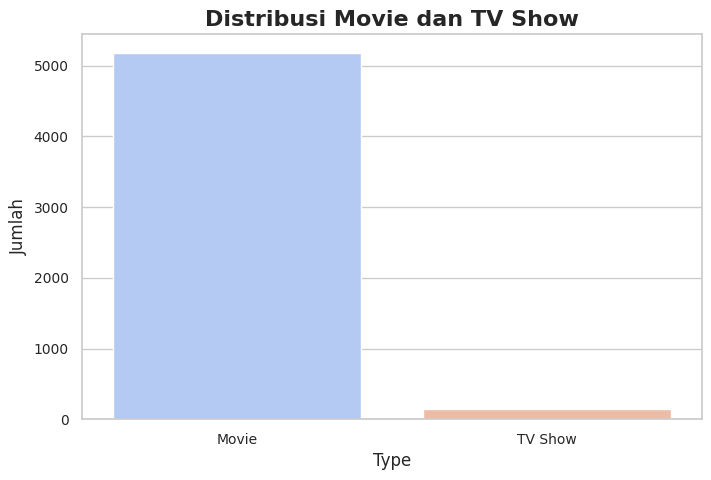

In [14]:
#type distribution 
# Hitung distribusi
type_distribution = cleaned_df['type'].value_counts().reset_index()
type_distribution.columns = ['type', 'count']

# Membuat bar plot
sns.set(style="whitegrid")  # Mengatur gaya tampilan
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='count', data=type_distribution, palette='coolwarm' )

# Tambahkan elemen visual
plt.title('Distribusi Movie dan TV Show', fontsize=16, fontweight='bold')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Sebagian besar data yang ada dalam dataset ini terdiri dari tayangan Movie, sementara TV Show terhitung sangat sedikit.

Menampilkan grafik histogram memberikan gambaran tentang distribusi jumlah rilis konten (baik Movie maupun TV Show) berdasarkan tahun rilisnya. Informasi ini membantu mengidentifikasi tren rilis konten dalam dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

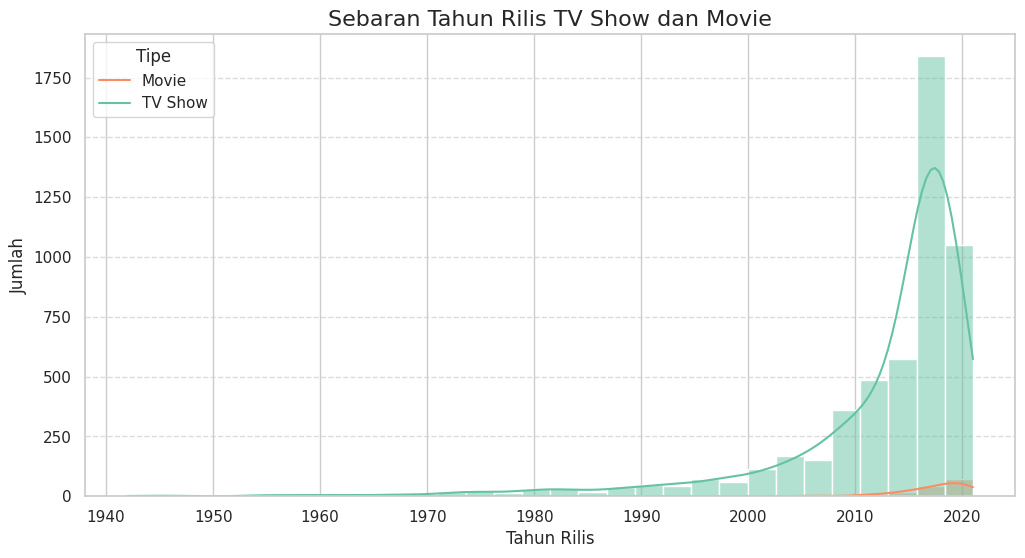

In [15]:
# Membuat figure
plt.figure(figsize=(12, 6))

# Plot histogram sebaran release_year untuk Movie dan TV Show
sns.histplot(data=cleaned_df, x='release_year', hue='type', kde=True, bins=30, palette='Set2')

# Tambahkan judul dan label
plt.title('Sebaran Tahun Rilis TV Show dan Movie', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Tipe', labels=['Movie', 'TV Show'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mayoritas tayangan dalam dataset dirilis pada dekade 2000-an hingga 2020-an, dengan dominasi Movie. Sebaran ini mencerminkan tren industri hiburan yang mengalami pertumbuhan besar dalam produksi konten selama dua dekade terakhir.

menampilkan grafik countplot yang memberikan distribusi jumlah konten untuk setiap kategori rating. Ini memudahkan analisis jenis rating apa yang paling umum atau jarang dalam dataset.

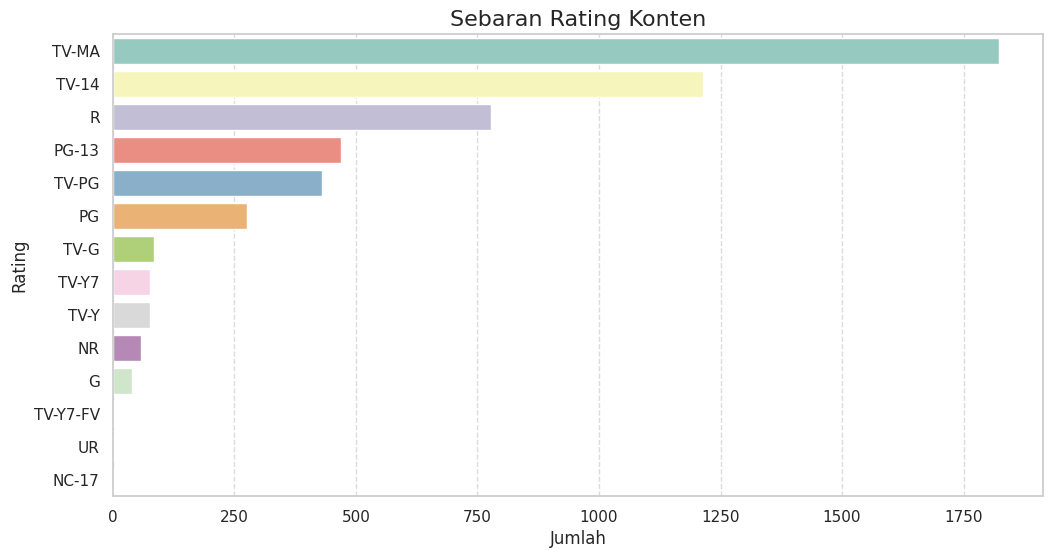

In [16]:
plt.figure(figsize=(12, 6))

# Countplot untuk distribusi rating
sns.countplot(data=cleaned_df, y='rating',  order=cleaned_df['rating'].value_counts().index, palette='Set3')

# Tambahkan judul dan label
plt.title('Sebaran Rating Konten', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Sebaran ini mencerminkan bahwa mayoritas konten dalam dataset ditargetkan untuk penonton dewasa dan remaja, sementara konten untuk anak-anak atau semua umur lebih jarang ditemukan. Hal ini mungkin mencerminkan tren industri hiburan yang cenderung memproduksi lebih banyak tayangan dengan tema dewasa.

menampilkan grafik barplot yang menunjukkan distribusi genre pada konten Netflix, membantu menganalisis genre mana yang paling banyak atau paling sedikit dalam dataset.

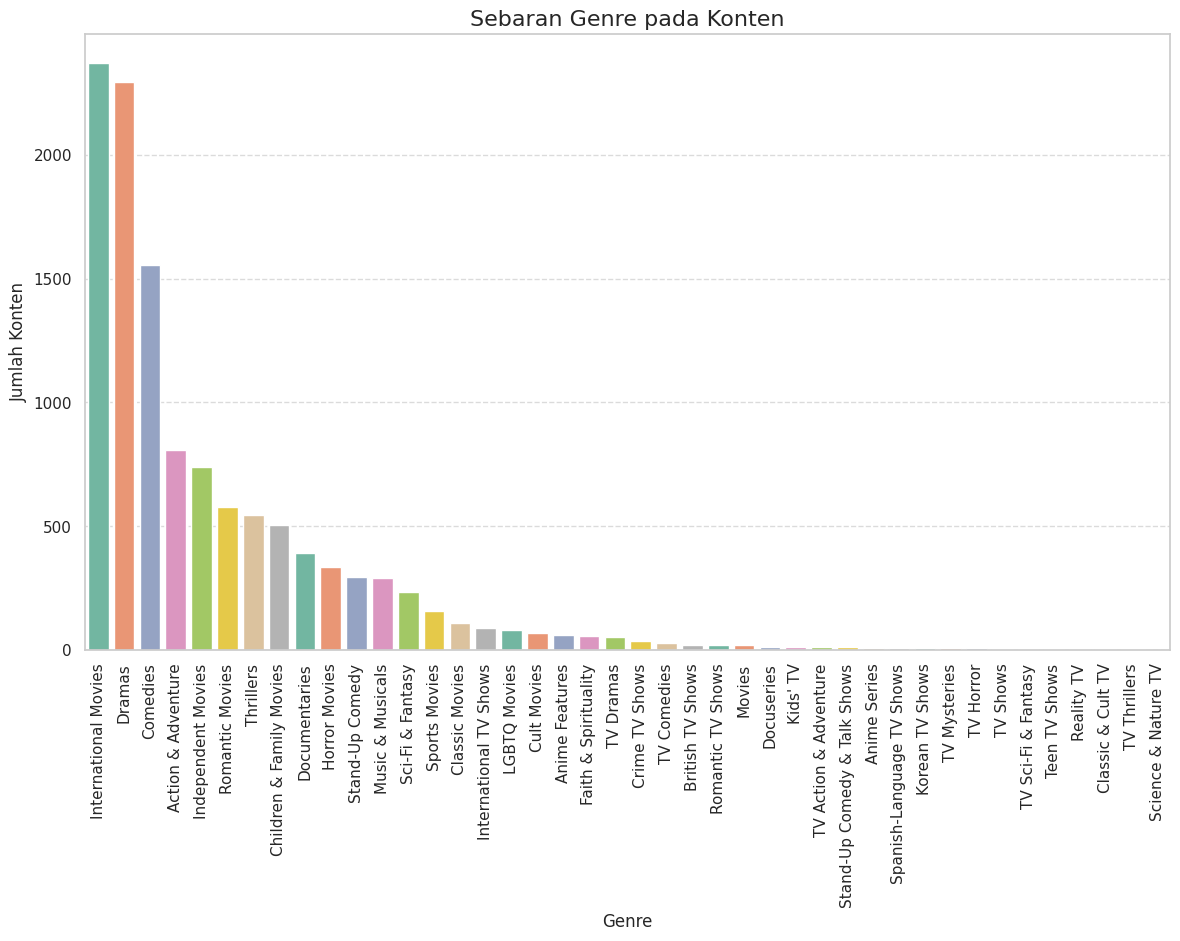

In [17]:
# Pisahkan genre di kolom 'listed_in' berdasarkan koma dan buat daftar semua genre
genres = cleaned_df['listed_in'].str.split(',').explode().str.strip()

# Hitung frekuensi setiap genre
genre_counts = genres.value_counts()

# Visualisasikan sebaran genre menggunakan barplot
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')

# Tambahkan judul dan label
plt.title('Sebaran Genre pada Konten', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dari sebaran dapat dilihat bahwa mayoritas konten adalah international movie diikuti drama dan komedi.

menampilkan grafik barplot yang menunjukkan distribusi konten berdasarkan negara. Ini memberikan gambaran tentang negara mana yang memiliki lebih banyak konten di platform Netflix.

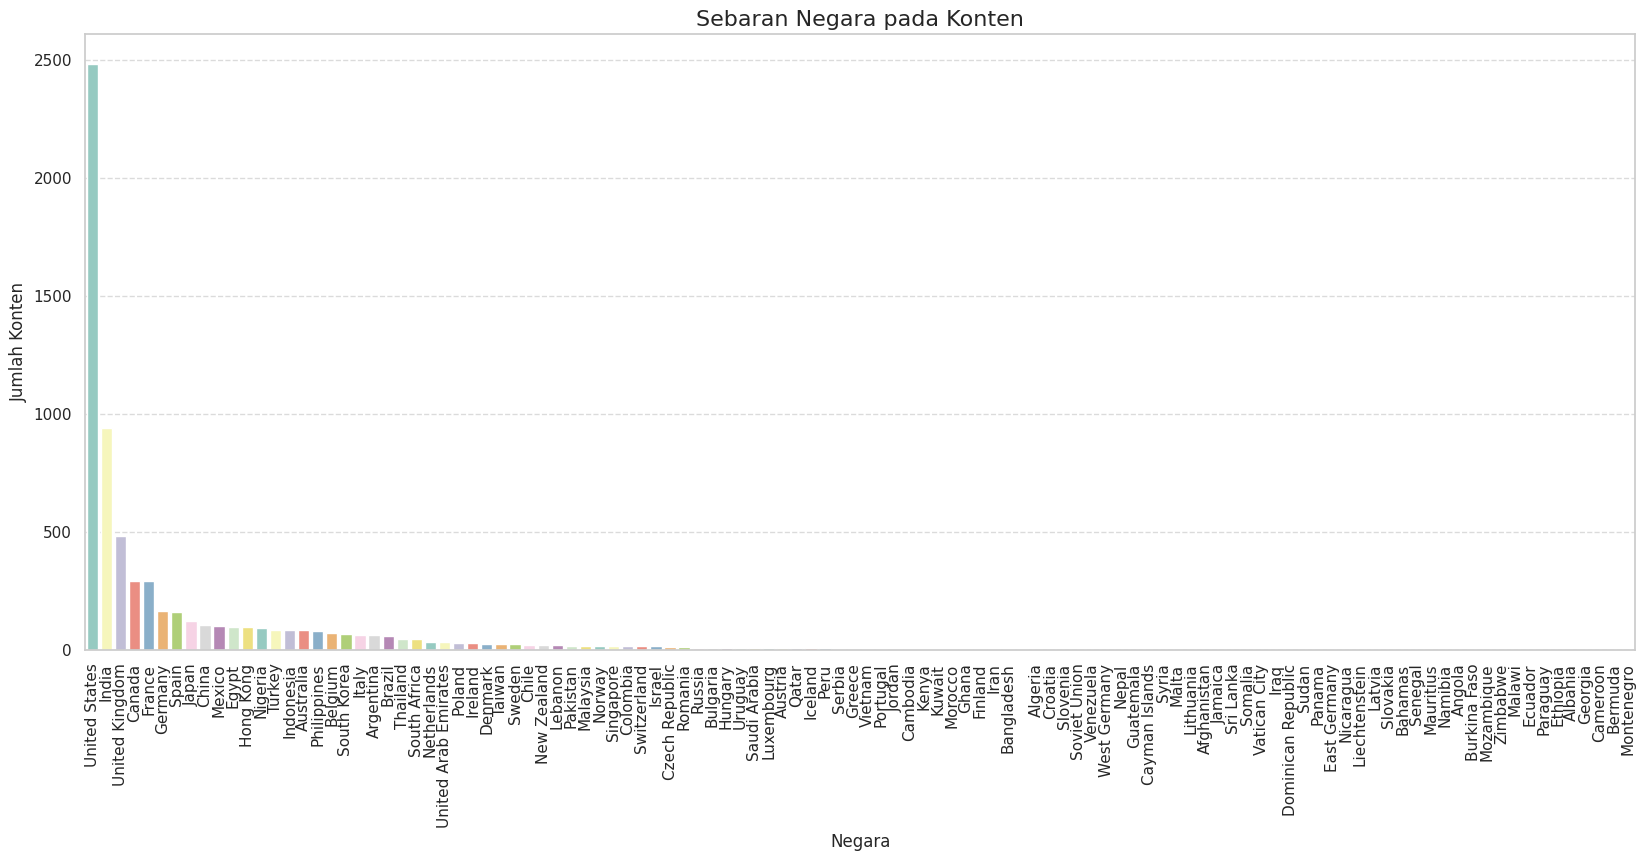

In [18]:
# Pisahkan negara di kolom 'country' berdasarkan koma dan buat daftar semua negara
countries = cleaned_df['country'].str.split(',').explode().str.strip()

# Hitung frekuensi setiap negara
country_counts = countries.value_counts()

# Visualisasikan sebaran negara menggunakan barplot
plt.figure(figsize=(20, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set3')

# Tambahkan judul dan label
plt.title('Sebaran Negara pada Konten', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


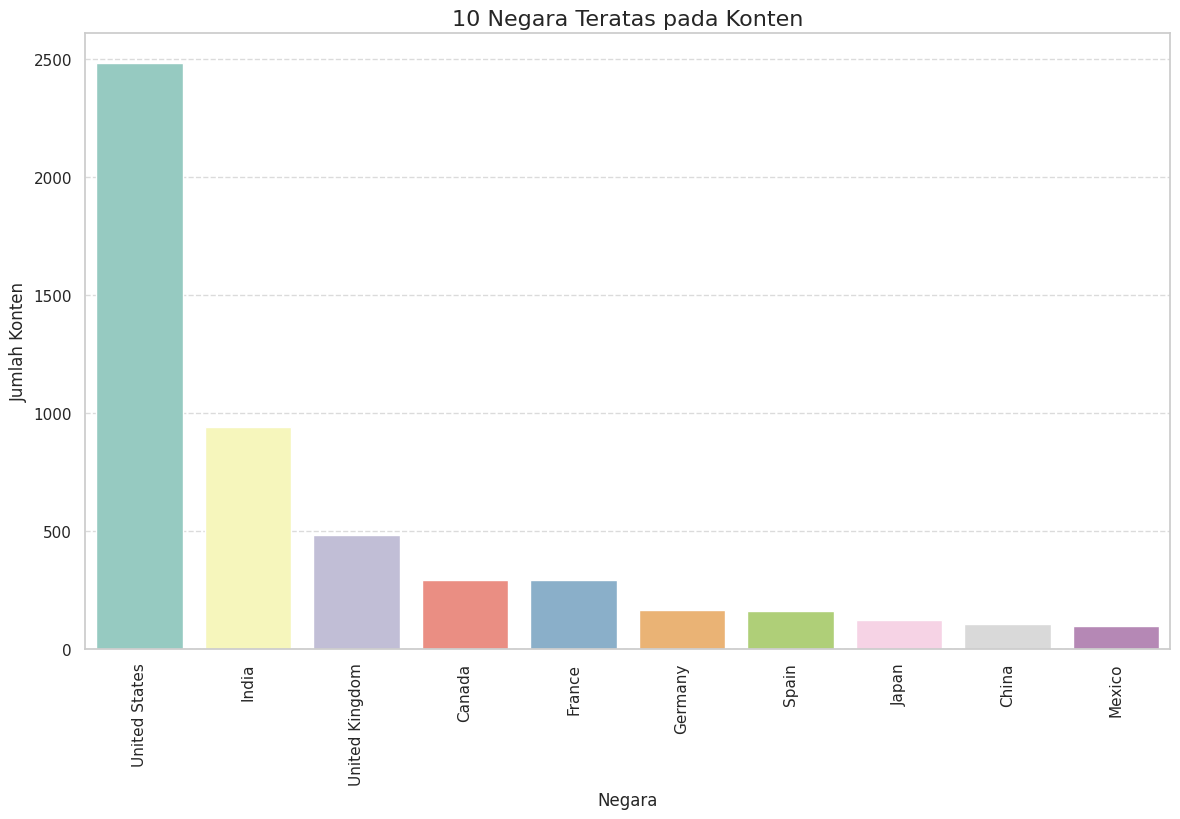

In [19]:
# Pilih 10 negara teratas
top_10_countries = country_counts.head(10)

# Visualisasikan 10 negara teratas
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='Set3')

# Tambahkan judul dan label
plt.title('10 Negara Teratas pada Konten', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dari sebaran dapat dilihat bahwa movie paling banyak di produksi oleh United States kemudian di ikuti India dan United kingdom.

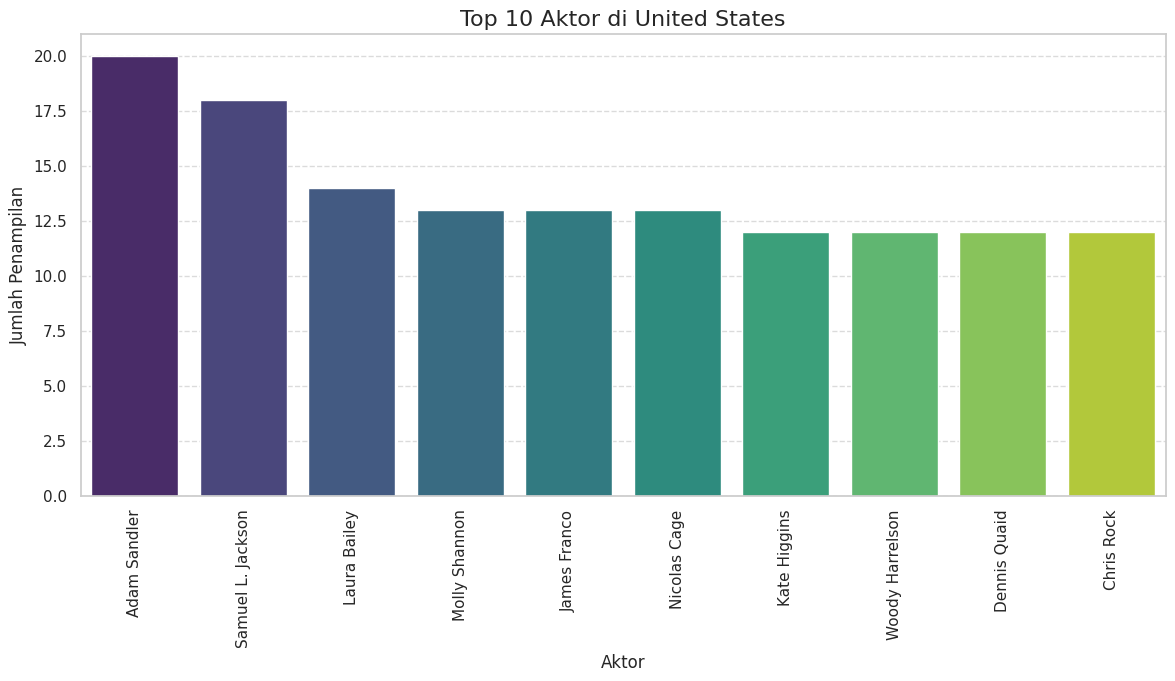

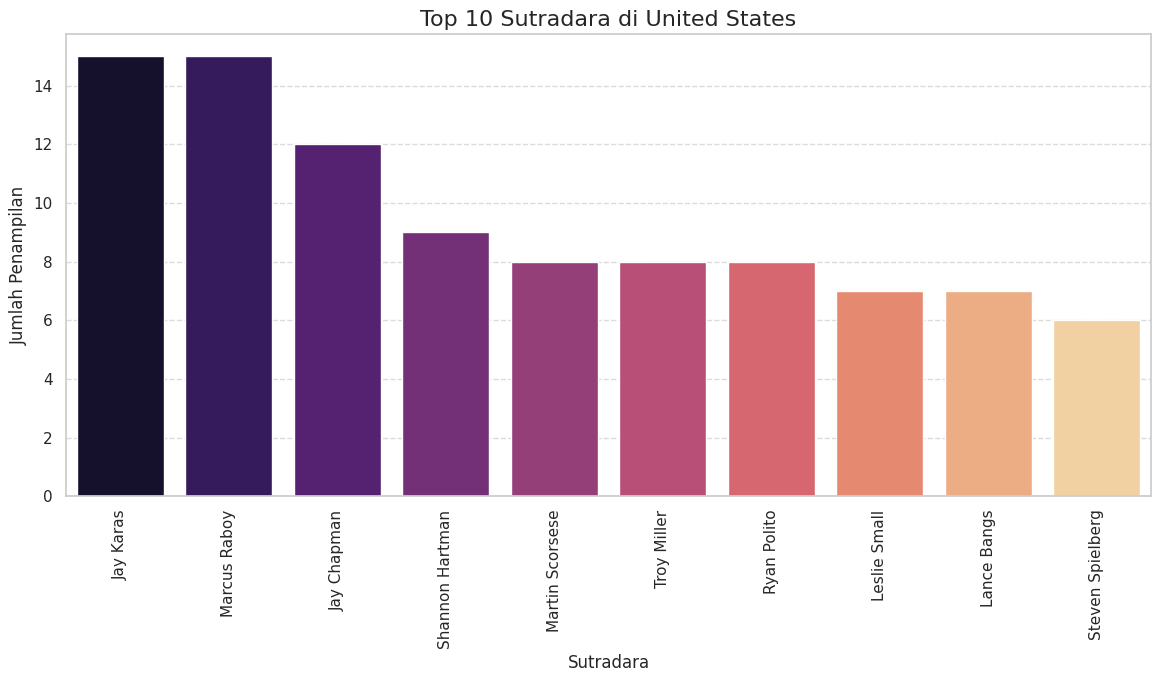

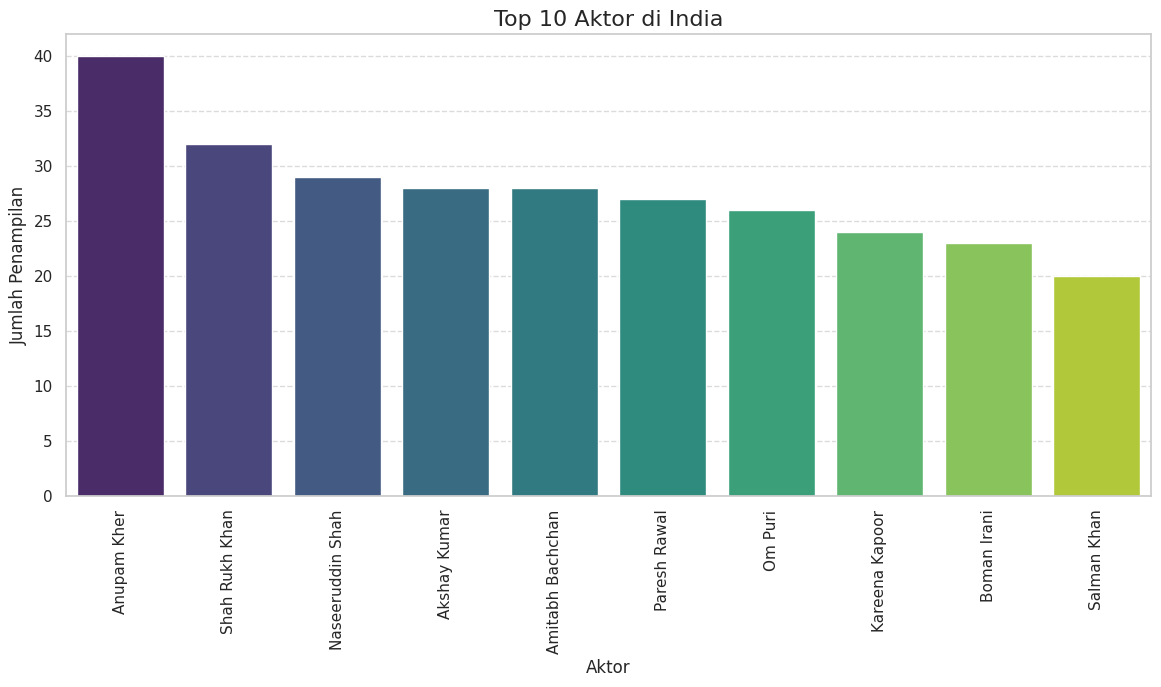

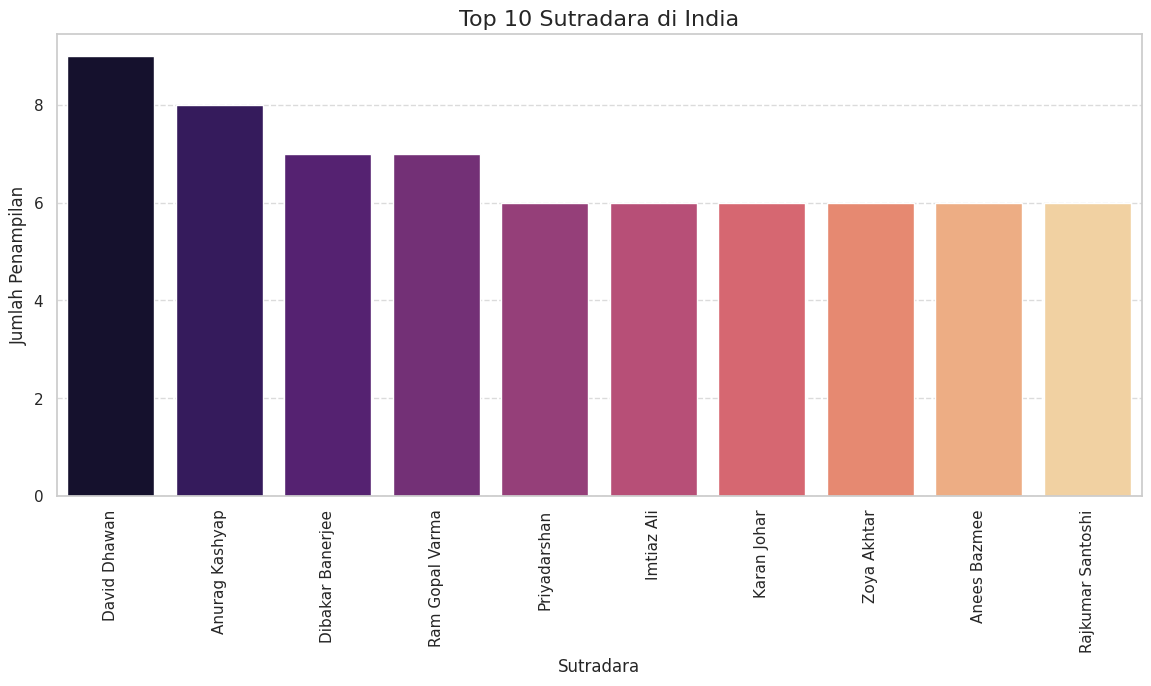

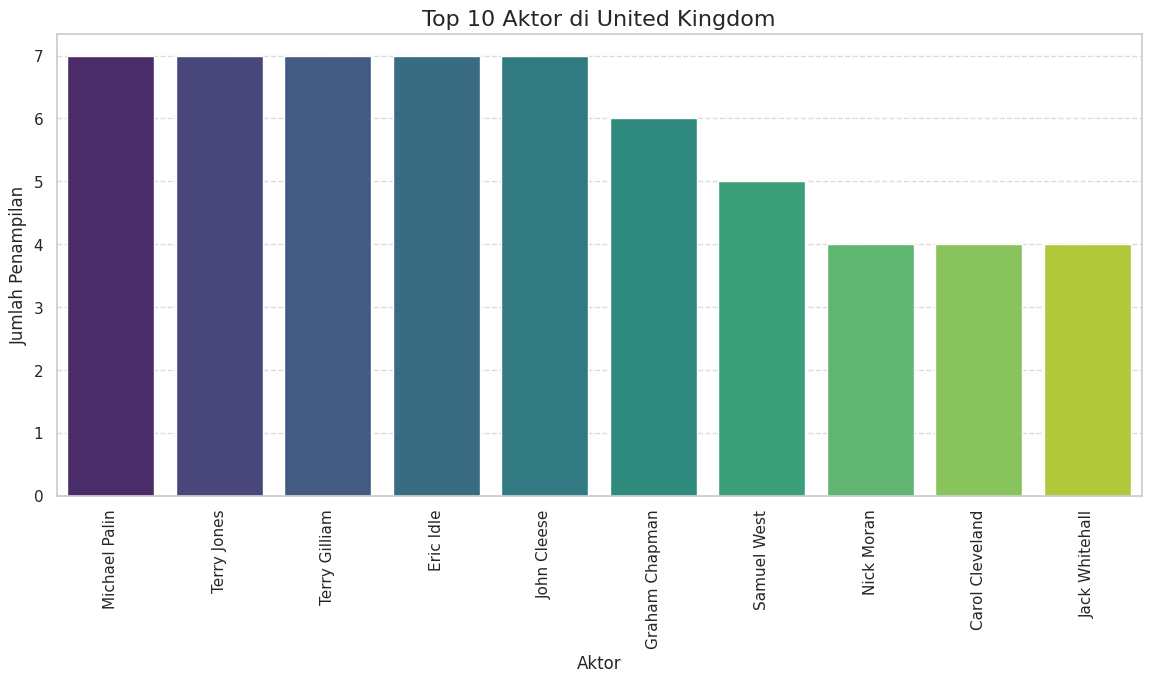

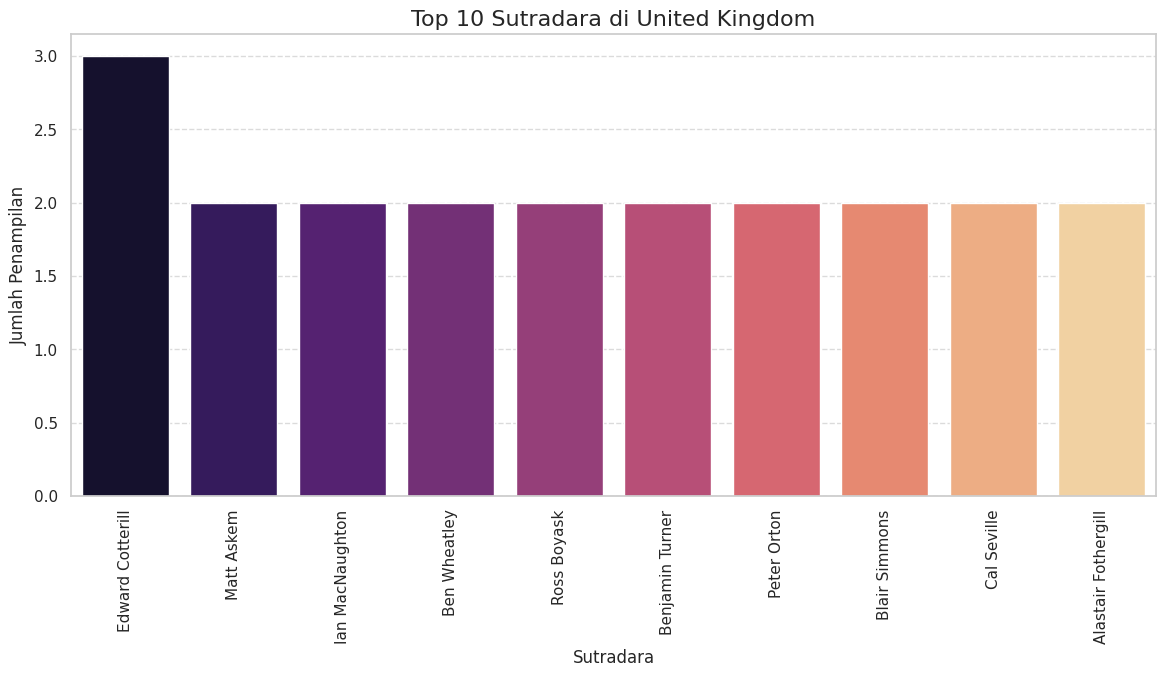

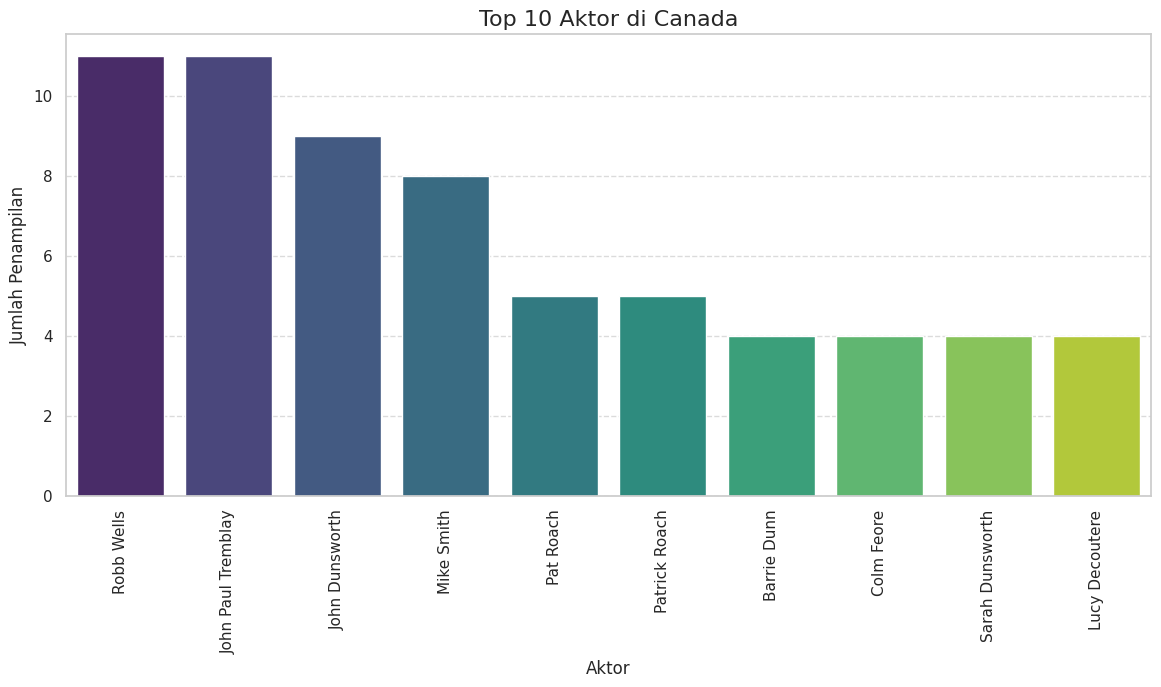

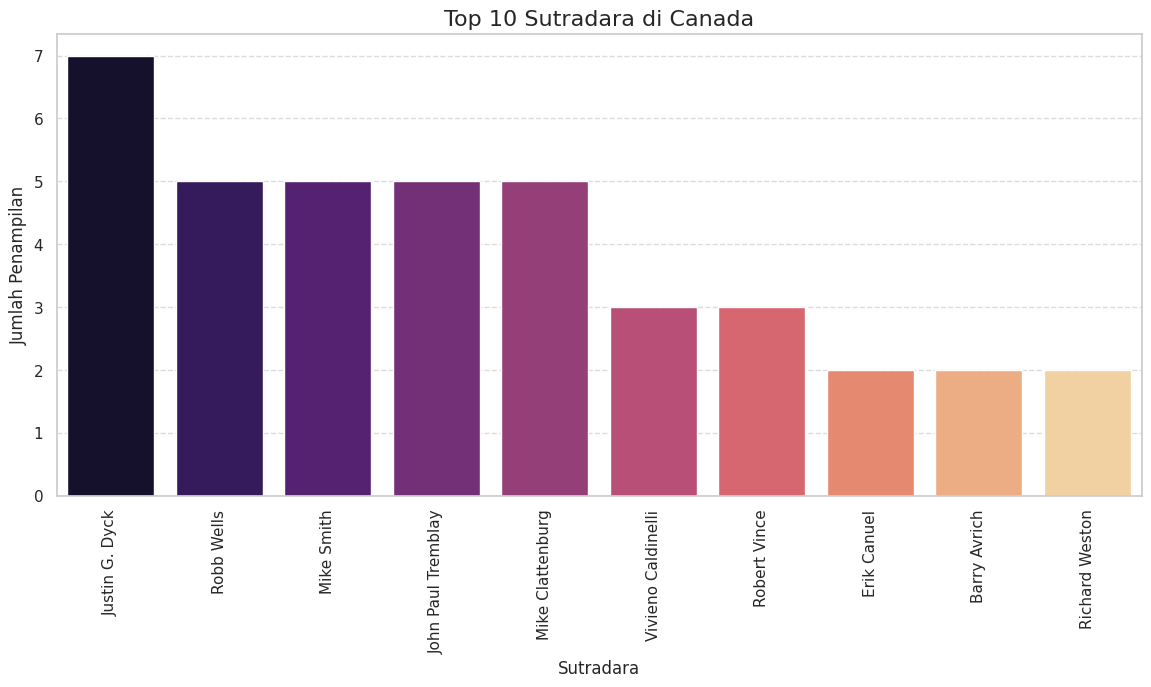

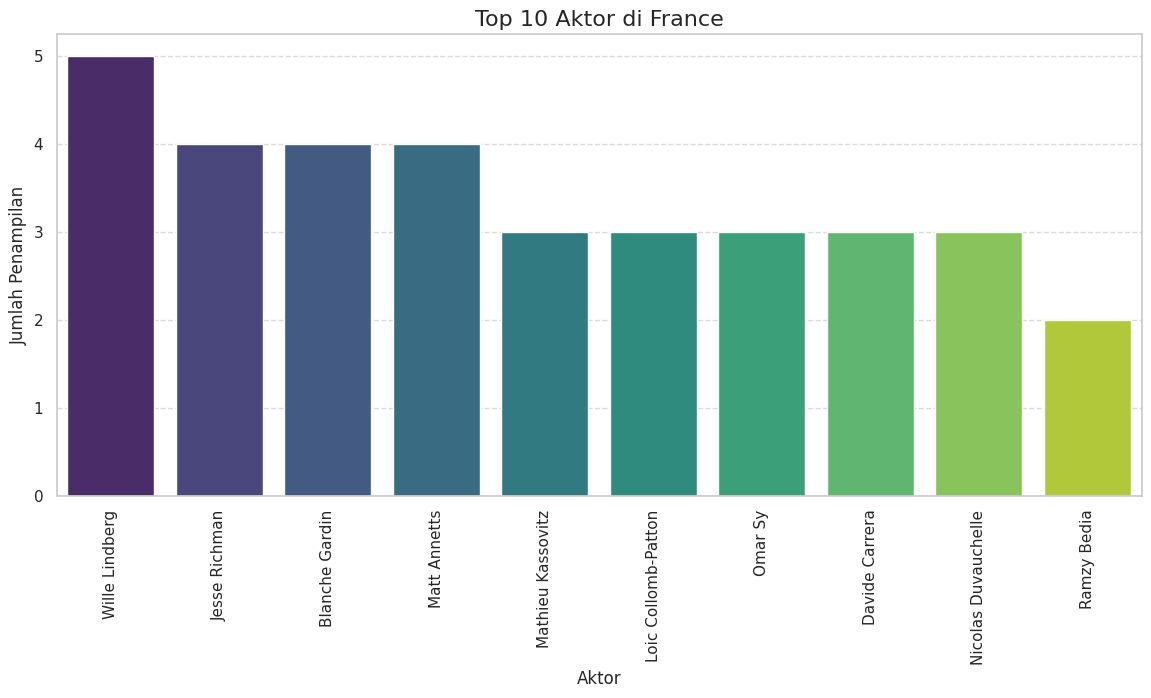

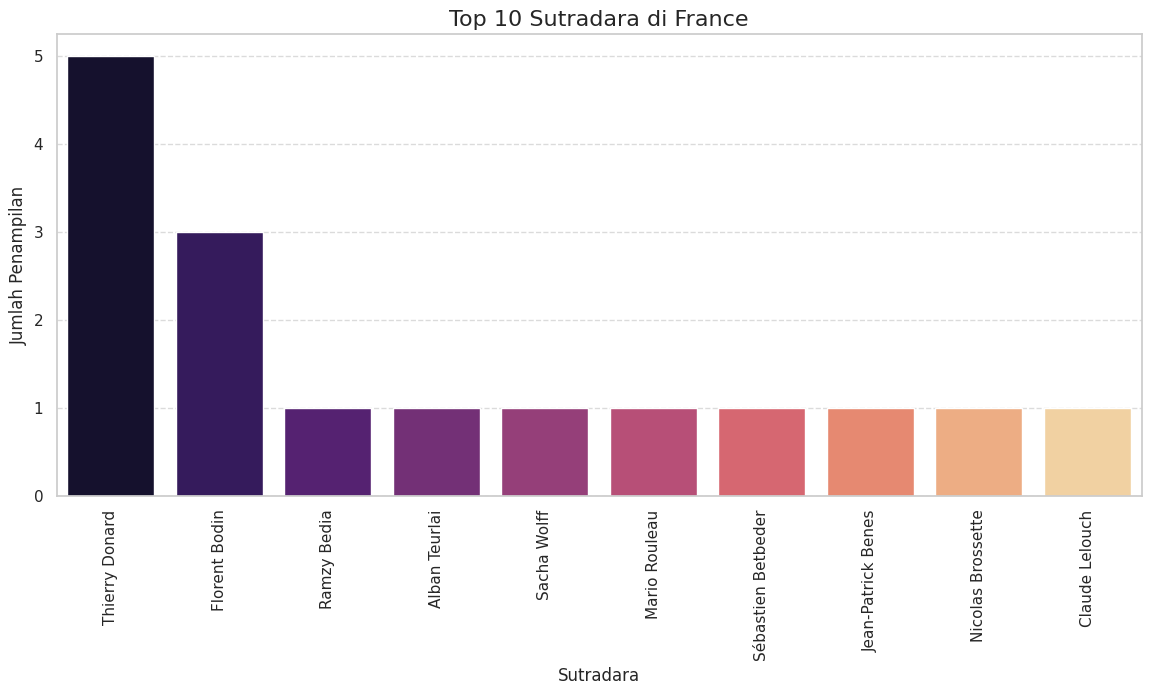

In [20]:
# Tentukan 5 negara dengan konten terbanyak
top_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France']

# Filter dataset berdasarkan negara-negara yang telah ditentukan
filtered_df = cleaned_df[cleaned_df['country'].isin(top_countries)]

# Buat fungsi untuk mendapatkan top 10 aktor dan direktur dari setiap negara
def top_actors_directors(country_name):
    # Filter data berdasarkan negara
    country_data = filtered_df[filtered_df['country'].str.contains(country_name)]
    
    # Pisahkan aktor dan direktur, pastikan tidak ada missing values
    actors = country_data['cast'].dropna().str.split(',').explode().str.strip()
    directors = country_data['director'].dropna().str.split(',').explode().str.strip()

    # Hitung frekuensi aktor dan direktur
    top_actors = actors.value_counts().head(10)
    top_directors = directors.value_counts().head(10)

    return top_actors, top_directors

# Visualisasi hasil top 10 aktor dan direktur untuk setiap negara
for country in top_countries:
    top_actors, top_directors = top_actors_directors(country)
    
    # Plot untuk aktor
    plt.figure(figsize=(14, 6))
    sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')
    plt.title(f'Top 10 Aktor di {country}', fontsize=16)
    plt.xlabel('Aktor', fontsize=12)
    plt.ylabel('Jumlah Penampilan', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot untuk direktur
    plt.figure(figsize=(14, 6))
    sns.barplot(x=top_directors.index, y=top_directors.values, palette='magma')
    plt.title(f'Top 10 Sutradara di {country}', fontsize=16)
    plt.xlabel('Sutradara', fontsize=12)
    plt.ylabel('Jumlah Penampilan', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()




# 4 | Content base filtering

## 4.1| Data prep

In [21]:
new_df = cleaned_df[['title','director','cast','listed_in','description']]
new_df.head()

,title,director,cast,listed_in,description
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Dramas, International Movies",After most of her family is murdered in a terr...
24,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Kode di bawah ini bertujuan untuk menghapus baris yang memiliki nilai kosong atau hanya berisi spasi pada kolom-kolom tertentu (`title`, `director`, `cast`, `listed_in`, `description`) dalam DataFrame `new_df`.

In [22]:
blanks = []  # Mulai dengan daftar kosong untuk menyimpan indeks yang memiliki nilai kosong atau hanya spasi

col = ['title', 'director', 'cast', 'listed_in', 'description']  # Daftar kolom yang akan diperiksa

for i, col in new_df.iterrows():  # Iterasi baris-baris dalam DataFrame
    if type(col) == str:  # Memastikan nilai kolom adalah tipe string (untuk menghindari NaN)
        if col.isspace():  # Memeriksa apakah nilai tersebut hanya berisi spasi
            blanks.append(i)  # Jika ya, tambahkan indeks baris ke dalam daftar 'blanks'

new_df.drop(blanks, inplace=True)  # Hapus baris-baris yang memiliki indeks dalam 'blanks' dari DataFrame


/tmp/ipykernel_30/905539247.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(blanks, inplace=True)  # Hapus baris-baris yang memiliki indeks dalam 'blanks' dari DataFrame


Mengekstrak kata kunci penting (`key words`) dari deskripsi film atau acara TV di dataset menggunakan algoritma RAKE dan menyimpannya dalam kolom baru `Key_words`. Setelah itu, kolom description dihapus dari DataFrame karena sudah tidak diperlukan.

In [23]:
import nltk

# Mengunduh model punkt
nltk.download('punkt', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

mengekstraksi kata kunci (keywords) dari deskripsi konten yang ada dalam DataFrame new_df menggunakan library Rake dari rake_nltk.

In [24]:
from rake_nltk import Rake

# Inisialisasi kolom Key_words sebagai daftar kosong
new_df['Key_words'] = [[] for _ in range(len(new_df))]

# Iterasi melalui DataFrame
for index, row in new_df.iterrows():
    description = row['description']
    
    # Menggunakan Rake untuk mengekstrak kata kunci
    r = Rake()  # By default, uses English stopwords from NLTK
    r.extract_keywords_from_text(description)
    
    # Mendapatkan kata kunci
    key_words_dict_scores = r.get_word_degrees()
    
    # Memperbarui kolom Key_words di DataFrame
    new_df.at[index, 'Key_words'] = list(key_words_dict_scores.keys())

# Menampilkan hasil
print(new_df[['title', 'Key_words']])


/tmp/ipykernel_30/2312296440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Key_words'] = [[] for _ in range(len(new_df))]


                              title  \
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   
12                     Je Suis Karl   
24                            Jeans   
...                             ...   
8801                        Zinzana   
8802                         Zodiac   
8804                     Zombieland   
8805                           Zoom   
8806                         Zubaan   

                                              Key_words  
7     [photo, shoot, ghana, american, model, slips, ...  
8     [talented, batch, amateur, bakers, face, 10, w...  
9     [woman, adjusting, life, loss, contends, feist...  
12    [family, murdered, terrorist, bombing, young, ...  
24    [father, man, loves, insists, twin, sons, marr...  
...                                                 ...  
8801  [recovering, alcoholic, talal, wakes, inside, ...  
8802  [political, cartoonist, crime, reporter, pair,...  
8804  [lo

In [25]:
new_df.head()

,title,director,cast,listed_in,description,Key_words
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ..."
8,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10, w..."
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Comedies, Dramas",A woman adjusting to life after a loss contend...,"[woman, adjusting, life, loss, contends, feist..."
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Dramas, International Movies",After most of her family is murdered in a terr...,"[family, murdered, terrorist, bombing, young, ..."
24,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"[father, man, loves, insists, twin, sons, marr..."


In [26]:
# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

/tmp/ipykernel_30/1101251391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns = ['description'], inplace = True)


In [27]:
new_df.head()

,title,director,cast,listed_in,Key_words
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","[photo, shoot, ghana, american, model, slips, ..."
8,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV","[talented, batch, amateur, bakers, face, 10, w..."
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Comedies, Dramas","[woman, adjusting, life, loss, contends, feist..."
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Dramas, International Movies","[family, murdered, terrorist, bombing, young, ..."
24,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","Comedies, International Movies, Romantic Movies","[father, man, loves, insists, twin, sons, marr..."


melakukan beberapa transformasi pada data dalam kolom cast, listed_in, dan director untuk membersihkan dan menyusun data sehingga lebih mudah diproses. 

In [28]:
# Menghapus koma di antara nama lengkap aktor dan hanya mengambil tiga nama pertama
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

# Mengubah genre menjadi daftar kata dengan huruf kecil
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

# Memisahkan nama depan dan belakang sutradara
new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# Menggabungkan nama depan dan belakang setiap aktor dan sutradara menjadi satu kata,
# sehingga tidak ada kebingungan antara orang-orang dengan nama depan yang sama
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

/tmp/ipykernel_30/1124940968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])
/tmp/ipykernel_30/1124940968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))
/tmp/ipykernel_30/1124940968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [29]:
new_df.set_index('title', inplace = True)
new_df.head()

,director,cast,listed_in,Key_words
title,,,,
Sankofa,"[Haile, Gerima]","[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[dramas, independent movies, international m...","[photo, shoot, ghana, american, model, slips, ..."
The Great British Baking Show,"[Andy, Devonshire]","[Mel Giedroyc, Sue Perkins, Mary Berry]","[british tv shows, reality tv]","[talented, batch, amateur, bakers, face, 10, w..."
The Starling,"[Theodore, Melfi]","[Melissa McCarthy, Chris O'Dowd, Kevin Kline]","[comedies, dramas]","[woman, adjusting, life, loss, contends, feist..."
Je Suis Karl,"[Christian, Schwochow]","[Luna Wedler, Jannis Niewöhner, Milan Peschel]","[dramas, international movies]","[family, murdered, terrorist, bombing, young, ..."
Jeans,"[S., Shankar]","[Prashanth, Aishwarya Rai Bachchan, Sri Laks...","[comedies, international movies, romantic mo...","[father, man, loves, insists, twin, sons, marr..."


membuat representasi teks tunggal dari berbagai kolom dalam DataFrame dan menyimpannya dalam kolom baru bag_of_words. 

In [30]:
# Fungsi untuk menggabungkan semua kolom menjadi satu string dengan huruf kecil
def combine_columns(row):
    words = ''
    for col in new_df.columns:
        if col != 'director':
            # Jika kolom berupa daftar, gabungkan elemen dengan spasi
            if isinstance(row[col], list):
                words += ' '.join(row[col]).lower() + ' '  # Huruf kecil
            else:
                words += str(row[col]).lower() + ' '       # Huruf kecil
        else:
            # Gabungkan nama di kolom director jika berupa daftar
            if isinstance(row[col], list):
                words += ''.join(row[col]).lower() + ' '  # Gabungkan nama dengan huruf kecil
            else:
                words += str(row[col]).lower() + ' '      # Huruf kecil
    return words.strip()

# Terapkan fungsi untuk membuat kolom bag_of_words
new_df['bag_of_words'] = new_df.apply(combine_columns, axis=1)

# Hapus semua kolom kecuali bag_of_words
new_df = new_df[['bag_of_words']]

/tmp/ipykernel_30/1424850786.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bag_of_words'] = new_df.apply(combine_columns, axis=1)


In [31]:
new_df.head()

,bag_of_words
title,
Sankofa,hailegerima kofi ghanaba oyafunmike ogunlano ...
The Great British Baking Show,andydevonshire mel giedroyc sue perkins mary...
The Starling,theodoremelfi melissa mccarthy chris o'dowd ...
Je Suis Karl,christianschwochow luna wedler jannis niewöhn...
Jeans,s.shankar prashanth aishwarya rai bachchan s...


## 4.2| Feature extraction and modeling

* Membuat dan menghasilkan matriks jumlah (count matrix) menggunakan CountVectorizer.
* Membuat sebuah Series untuk mencocokkan indeks dengan judul film, yang bisa digunakan nanti untuk referensi dalam proses pencocokan atau rekomendasi berbasis konten.

In [32]:
# Membuat dan menghasilkan matriks jumlah (count matrix)
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# Membuat Series untuk judul film sehingga judul-judul tersebut dihubungkan
# dengan daftar numerik berurutan. Daftar ini akan digunakan nanti untuk mencocokkan indeks.
indices = pd.Series(new_df.index)
indices[:5]

0                          Sankofa
1    The Great British Baking Show
2                     The Starling
3                     Je Suis Karl
4                            Jeans
Name: title, dtype: object

menghasilkan matriks kesamaan kosinus (cosine similarity matrix) antara semua film berdasarkan representasi teks yang telah dibuat menggunakan CountVectorizer.

In [33]:
# Menghasilkan matriks kesamaan kosinus (cosine similarity matrix)
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Menampilkan matriks kesamaan kosinus
cosine_sim

array([[1.        , 0.        , 0.03806935, ..., 0.0745356 , 0.07027284,
        0.17251639],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03806935, 0.        , 1.        , ..., 0.08512565, 0.08025724,
        0.07881104],
       ...,
       [0.0745356 , 0.        , 0.08512565, ..., 1.        , 0.07856742,
        0.03857584],
       [0.07027284, 0.        , 0.08025724, ..., 0.07856742, 1.        ,
        0.0727393 ],
       [0.17251639, 0.        , 0.07881104, ..., 0.03857584, 0.0727393 ,
        1.        ]])

In [34]:
# Fungsi yang menerima judul film sebagai input dan mengembalikan 10 rekomendasi film teratas
def recommendations(Title, cosine_sim=cosine_sim):
    
    recommended_movies = []  # Daftar untuk menyimpan rekomendasi film
    
    # Mendapatkan indeks film yang sesuai dengan judul
    idx = indices[indices == Title].index[0]

    # Membuat Series dengan skor kesamaan dalam urutan menurun
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # Mendapatkan indeks 10 film yang paling mirip
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # Mengisi daftar dengan judul dari 10 film yang paling sesuai
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies


untuk mengevaluasi hasil rekomendasi dari model kita menggunakan precisi yang membagi berapa banyak rekomendasi yang relevan dengan jumlah total rekomendasi.

In [35]:
recommendations('Adrift')

['The 12th Man',
 'Needhi Singh',
 'Loving',
 'Paskal',
 'Defiance',
 'The Mirror Boy',
 'Shootout at Lokhandwala',
 'The Siege of Jadotville',
 'Shiva',
 'Mosul']

dari hasil diatas terdapat 9 movie yang sangat relevant dengan judul yang dicari sehingga precision dari hasil diatas adalah 90%

In [36]:
recommendations('Kung Fu Yoga')

['Rumble in the Bronx',
 'Railroad Tigers',
 'Once a Gangster',
 'The Forbidden Kingdom',
 'The Spy Next Door',
 'Malang',
 'Mohenjo Daro',
 'Dragon Tiger Gate',
 'Brothers',
 "We'll Be Right Back After The Break"]

dari hasil diatas terdapat 6 movie yang relevant dengan hasil rekomendasi sehingga precisi dari rekomendasi diatas adalah 60%

# 5 | Colaborative filtering 

## 5.1 | Data prep

Membaca file data yang berisi informasi terkait pelanggan Netflix dan rating yang mereka berikan, kemudian mengonversi kolom Rating menjadi tipe data float.

In [37]:
# Membaca file combined_data_1.txt dengan mengambil hanya dua kolom pertama (Customer ID dan Rating)
df1 = pd.read_csv(
    '/kaggle/input/netflix-prize-data/combined_data_1.txt',
    header=None,  # Tidak ada header pada file
    names=['Cust_Id', 'Rating'],  # Menamai kolom sebagai Cust_Id dan Rating
    usecols=[0, 1]  # Mengambil hanya kolom ke-0 dan ke-1
)

# Mengonversi kolom Rating menjadi tipe float
df1['Rating'] = df1['Rating'].astype(float)

In [52]:
df1.shape

(24058263, 2)

In [38]:
df1.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [40]:
df1.index = np.arange(0,len(df1))
df1.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


/tmp/ipykernel_30/2140807629.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = df1.isnull().sum()[1]
/tmp/ipykernel_30/2140807629.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


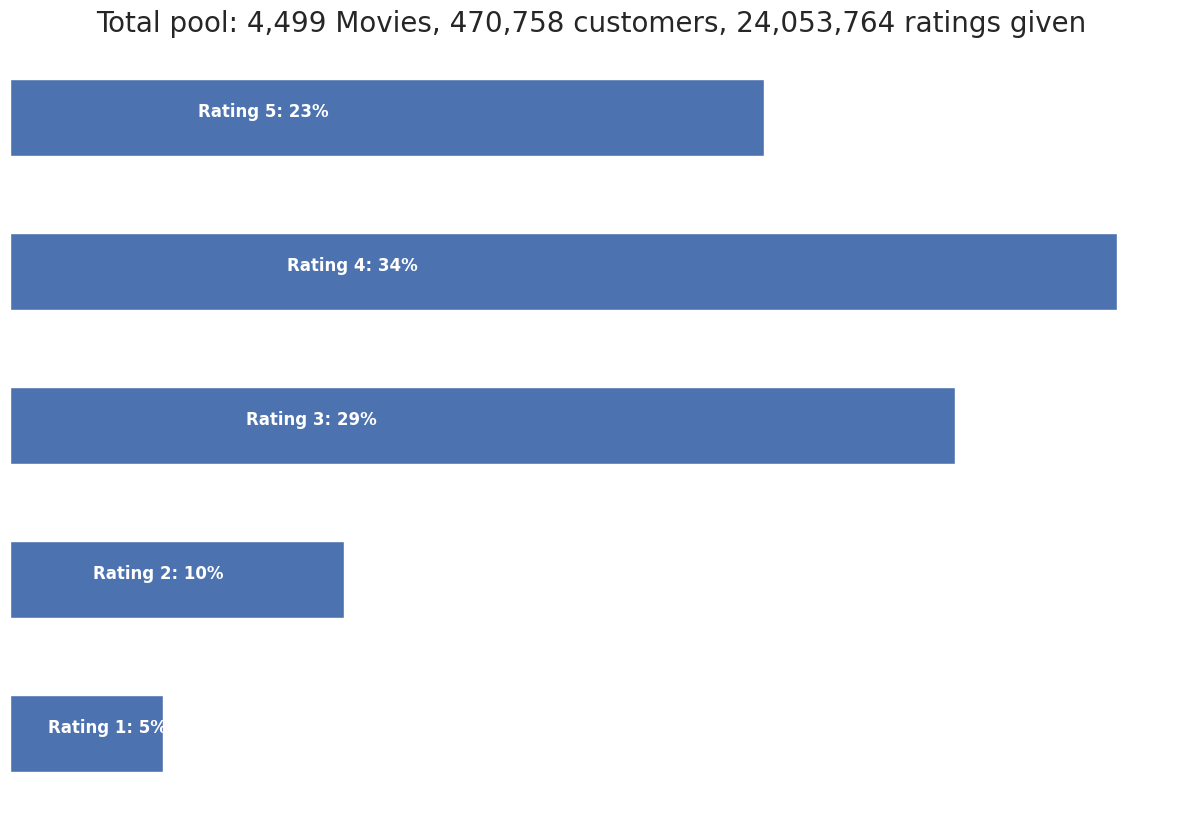

In [53]:
p = df1.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df1.isnull().sum()[1]

# get customer count
cust_count = df1['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df1['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [41]:
# Membuat DataFrame untuk menandai nilai NaN dalam kolom Rating
df_nan = pd.DataFrame(pd.isnull(df1.Rating))
df_nan = df_nan[df_nan['Rating'] == True]  # Memfilter hanya baris dengan Rating kosong
df_nan = df_nan.reset_index()  # Mengatur ulang indeks untuk proses lebih lanjut

# Inisialisasi variabel
movie_np = []  # Daftar untuk menyimpan ID film
movie_id = 1  # ID awal film

# Mengisi ID film untuk setiap segmen data
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    # Membuat array NumPy dengan panjang sesuai selisih indeks
    temp = np.full((1, i-j-1), movie_id)
    # Menambahkan array ke daftar movie_np
    movie_np = np.append(movie_np, temp)
    # Menambah ID film
    movie_id += 1

# Menangani data terakhir
last_record = np.full((1, len(df1) - df_nan.iloc[-1, 0] - 1), movie_id)
movie_np = np.append(movie_np, last_record)

In [42]:
# Menghapus baris dengan nilai NaN pada kolom Rating
df = df1[pd.notnull(df1['Rating'])]

# Menambahkan kolom Movie_Id ke DataFrame, dengan mengonversi movie_np menjadi tipe integer
df['Movie_Id'] = movie_np.astype(int)

# Mengonversi kolom Cust_Id ke tipe integer
df['Cust_Id'] = df['Cust_Id'].astype(int)


/tmp/ipykernel_30/4147650273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)
/tmp/ipykernel_30/4147650273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


In [43]:
print(df.iloc[::5000000, :])

          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [44]:
df.shape

(24053764, 3)

In [45]:
# Statistik ulasan untuk setiap film
f = ['count', 'mean']  # Fungsi agregasi: hitung jumlah dan rata-rata
df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)

# Mengonversi indeks Movie_Id menjadi integer
df_movie_summary.index = df_movie_summary.index.map(int)

# Menentukan ambang batas ulasan film berdasarkan kuantil 80%
movie_benchmark = round(df_movie_summary['count'].quantile(0.8), 0)

# Membuat daftar film yang memiliki jumlah ulasan di bawah ambang batas
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

# Mencetak ambang batas minimum ulasan untuk film
print('Movie minimum times of review: {}'.format(movie_benchmark))

# Statistik ulasan untuk setiap pelanggan
df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)

# Mengonversi indeks Cust_Id menjadi integer
df_cust_summary.index = df_cust_summary.index.map(int)

# Menentukan ambang batas ulasan pelanggan berdasarkan kuantil 80%
cust_benchmark = round(df_cust_summary['count'].quantile(0.8), 0)

# Membuat daftar pelanggan yang memiliki jumlah ulasan di bawah ambang batas
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

# Mencetak ambang batas minimum ulasan untuk pelanggan
print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 3884.0
Customer minimum times of review: 79.0


In [46]:
# Menampilkan ukuran dataset sebelum pemotongan
print('Original Shape: {}'.format(df.shape))

# Menghapus baris yang mengandung Movie_Id dalam daftar drop_movie_list
df = df[~df['Movie_Id'].isin(drop_movie_list)]

# Menghapus baris yang mengandung Cust_Id dalam daftar drop_cust_list
df = df[~df['Cust_Id'].isin(drop_cust_list)]

# Menampilkan ukuran dataset setelah pemotongan
print('After Trim Shape: {}'.format(df.shape))

# Menampilkan contoh data dengan interval 5 juta baris
print('-Data Examples-')
print(df.iloc[::5000000, :])

Original Shape: (24053764, 3)
After Trim Shape: (13528427, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
5109       785314     1.0         8
8889698    332300     3.0      1770
17751978   629874     4.0      3391


In [47]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(95325, 900)


memuat file `movie_titles.csv`, yang berisi metadata tentang film, ke dalam DataFrame `df_title`

In [48]:
df_title = pd.read_csv(
    '/kaggle/input/netflix-prize-data/movie_titles.csv',
    encoding="ISO-8859-1",
    header=None,
    names=['Movie_Id', 'Year', 'Name'],
    on_bad_lines='skip'
)

print (df_title.head(10))

   Movie_Id    Year                          Name
0         1  2003.0               Dinosaur Planet
1         2  2004.0    Isle of Man TT 2004 Review
2         3  1997.0                     Character
3         4  1994.0  Paula Abdul's Get Up & Dance
4         5  2004.0      The Rise and Fall of ECW
5         6  1997.0                          Sick
6         7  1992.0                         8 Man
7         8  2004.0    What the #$*! Do We Know!?
8         9  1991.0      Class of Nuke 'Em High 2
9        10  2001.0                       Fighter


## 5.2 | Modeling

In [49]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()

# menggunakan 100.000 baris untuk waktu pelatihan lebih cepat
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Inisialisasi algoritma
algo = SVD()

# Evaluasi dengan cross-validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9925  0.9824  0.9810  0.9946  0.9780  0.9857  0.0066  
MAE (testset)     0.7842  0.7860  0.7778  0.7845  0.7876  0.7840  0.0033  
Fit time          1.48    1.54    1.65    1.63    1.57    1.57    0.06    
Test time         0.11    0.10    0.11    0.26    0.12    0.14    0.06    


In [50]:
# Fungsi untuk memprediksi film yang mungkin disukai user
def recommend_movies(user_id, df_movies, n=10):
    # Mendapatkan daftar film yang belum ditonton user
    watched_movies = df[df['Cust_Id'] == user_id]['Movie_Id'].unique()
    movies_to_predict = df_movies[~df_movies['Movie_Id'].isin(watched_movies)]
    
    # Memprediksi skor untuk setiap film
    movies_to_predict['Estimate_Score'] = movies_to_predict['Movie_Id'].apply(
        lambda x: algo.predict(user_id, x).est
    )
    
    # Mengurutkan berdasarkan skor prediksi
    recommendations = movies_to_predict.sort_values('Estimate_Score', ascending=False)
    
    return recommendations[['Name', 'Year', 'Estimate_Score']].head(n)

In [51]:
recommended_movies = recommend_movies(user_id=78531, df_movies=df_title)
print(recommended_movies)

                         Name    Year  Estimate_Score
27            Lilo and Stitch  2002.0        3.808000
29     Something's Gotta Give  2003.0        3.701620
17           Immortal Beloved  1994.0        3.687736
0             Dinosaur Planet  2003.0        3.627312
11627                 Bewafaa  2005.0        3.627312
11626               Cleopatra  2004.0        3.627312
11625   Nosferatu the Vampyre  1979.0        3.627312
11624              Mark Twain  2000.0        3.627312
11623                   Omagh  2004.0        3.627312
11622    Three Men and a Baby  1987.0        3.627312
